In [8]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import glob
import os

# 경로 설정
folder_path = r"C:\Users\sol91\00_Python_Notebook\24_2\dscd\preprocessing"
file_pattern = os.path.join(folder_path, '*.csv')  # 모든 CSV 파일

# glob을 사용하여 모든 CSV 파일을 리스트로 불러오기
file_list = glob.glob(file_pattern)

# 각 파일을 읽어서 데이터프레임 리스트에 저장
df_list = [pd.read_csv(file) for file in file_list]

# 데이터프레임을 하나로 합치기
combined_df = pd.concat(df_list, ignore_index=True)

# 결과 확인
print(combined_df.head())
print(f"Total rows: {len(combined_df)}")

In [ ]:
combined_df.drop([f'{i}_ask_price' for i in range(1, 11)] + [f'{i}_bid_price' for i in range(1, 11)], axis = 1, inplace = True)
combined_df.columns

In [ ]:
combined_df

In [ ]:
corr_matrix = combined_df.drop(['ask_bid', 'cum_vp'], axis = 1).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, square = True, fmt=".1f")

In [ ]:
combined_df.drop(['ask_bid', 'ask_vwap', 'bid_vwap', 'cum_vp'], axis = 1, inplace = True)

In [ ]:
combined_df

In [ ]:
import pandas as pd

# 10분 후의 timestamp를 계산하여 새 열 생성
combined_df['timestamp_10min_later'] = combined_df['timestamp'] + 600000

# 원본 데이터프레임과 10분 후 timestamp 기준으로 가장 가까운 행을 병합
df_merged = pd.merge_asof(combined_df,
                          combined_df[['timestamp', 'trade_price']].rename(columns={'timestamp': 'nearest_timestamp', 'trade_price': 'trade_price_10min_later'}),
                          left_on='timestamp_10min_later',
                          right_on='nearest_timestamp',
                          direction='forward')

# trade_price 비교하여 after_10_min 열 생성
df_merged['after_10_min'] = (df_merged['trade_price_10min_later'] > df_merged['trade_price']).astype(int)

In [ ]:
#nearest_timestamp가 NaN인 경우 확인
df_merged.nearest_timestamp.isna().sum()

In [ ]:
df_merged = df_merged.dropna().reset_index(drop=True)
df_merged

In [ ]:
# 필요한 열만 선택
df_merged.index = df_merged['timestamp']
df_merged.drop(['timestamp', 'timestamp_10min_later', 'nearest_timestamp', 'trade_price_10min_later', 'avgPrice_diff'], axis = 1, inplace = True)
df_merged

In [ ]:
df_merged.drop([f'{i}_ask_size' for i in range(6, 11)] + [f'{i}_bid_size' for i in range(6, 11)], axis = 1, inplace = True)
df_merged

In [ ]:
df_merged.to_csv('final_data.csv')

## RUN

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_merged

,timestamp,total_ask_size,total_bid_size,1_ask_size,1_bid_size,2_ask_size,2_bid_size,3_ask_size,3_bid_size,4_ask_size,4_bid_size,5_ask_size,5_bid_size,trade_price,trade_volume,spread,imbalance,totalSize_ratio,after_10_min
0,1727004626286,1.604788,0.474972,0.079053,0.083139,0.664712,0.060188,0.001000,0.126477,0.000299,0.002439,0.329725,0.001719,83865000.0,0.003577,2000.0,-0.586424,0.260697,1
1,1727004626486,1.604788,0.474525,0.079053,0.020246,0.664712,0.083139,0.001000,0.060188,0.000299,0.126477,0.329725,0.002439,83864000.0,0.000179,1000.0,-0.570077,0.273823,1
2,1727004627086,1.604788,0.474525,0.079053,0.020246,0.664712,0.083139,0.001000,0.060188,0.000299,0.126477,0.329725,0.002439,83864000.0,0.000179,1000.0,-0.570077,0.273823,1
3,1727004627486,1.604788,0.474525,0.079053,0.020246,0.664712,0.083139,0.001000,0.060188,0.000299,0.126477,0.329725,0.002439,83864000.0,0.000179,1000.0,-0.570077,0.273823,1
4,1727004627786,1.418733,0.474525,0.543764,0.020246,0.001000,0.083139,0.000299,0.060188,0.329725,0.126477,0.138745,0.002439,83885000.0,0.120947,21000.0,-0.551751,0.288866,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012599,1730126996013,2.895852,1.073478,0.042948,0.012691,0.486217,0.024640,0.293135,0.072440,0.659504,0.006471,0.990263,0.148616,96238000.0,0.000829,20000.0,-0.567196,0.276165,0
6012600,1730126996913,2.894194,1.073478,0.041290,0.012691,0.486217,0.024640,0.293135,0.072440,0.659504,0.006471,0.990263,0.148616,96238000.0,0.001658,20000.0,-0.566991,0.276331,0
6012601,1730126997613,2.899389,1.068375,0.046486,0.012691,0.486217,0.024640,0.293135,0.000200,0.659504,0.072440,0.990263,0.006471,96238000.0,0.001658,20000.0,-0.701932,0.175135,0
6012602,1730126997713,2.910013,1.068375,0.057109,0.012691,0.486217,0.024640,0.293135,0.000200,0.659504,0.072440,0.990263,0.006471,96238000.0,0.001658,20000.0,-0.702908,0.174462,0


Train set: (4810067, 20, 18), Test set: (1202517, 20, 18)


Training Progress:   0%|                                                                         | 0/5 [00:00<?, ?it/s]

Epoch 1/5
75158/75158 [==============================] - ETA: 0s - loss: 0.6743 - accuracy: 0.5651

Training Progress:  20%|█████████▊                                       | 1/5 [45:21<3:01:24, 2721.01s/it, loss=0.674]

75158/75158 [==============================] - 2721s 36ms/step - loss: 0.6743 - accuracy: 0.5651
Epoch 2/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.6290 - accuracy: 0.6277

Training Progress:  40%|██████████████████▊                            | 2/5 [1:31:34<2:17:36, 2752.13s/it, loss=0.629]

75158/75158 [==============================] - 2774s 37ms/step - loss: 0.6290 - accuracy: 0.6277
Epoch 3/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.5902 - accuracy: 0.6667

Training Progress:  60%|████████████████████████████▊                   | 3/5 [2:17:48<1:32:03, 2761.93s/it, loss=0.59]

75158/75158 [==============================] - 2774s 37ms/step - loss: 0.5902 - accuracy: 0.6667
Epoch 4/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.5619 - accuracy: 0.6916

Training Progress:  80%|███████████████████████████████████████▏         | 4/5 [3:04:38<46:20, 2780.82s/it, loss=0.562]

75158/75158 [==============================] - 2810s 37ms/step - loss: 0.5619 - accuracy: 0.6916
Epoch 5/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.5410 - accuracy: 0.7091

Training Progress: 100%|█████████████████████████████████████████████████| 5/5 [3:51:23<00:00, 2789.76s/it, loss=0.541]

75158/75158 [==============================] - 2806s 37ms/step - loss: 0.5410 - accuracy: 0.7091


Training Progress: 100%|█████████████████████████████████████████████████| 5/5 [3:51:23<00:00, 2776.78s/it, loss=0.541]


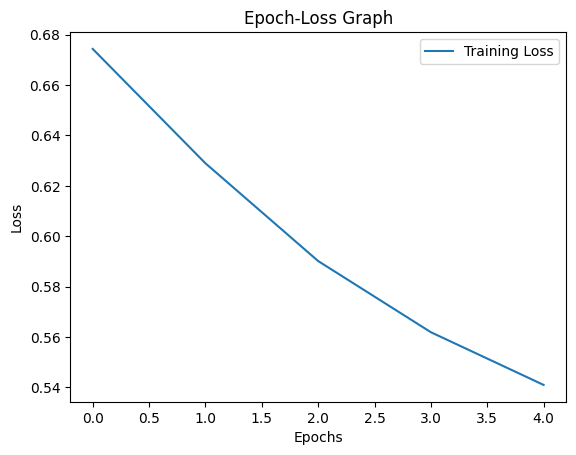

Test Loss: 0.5297, Test Accuracy: 0.7182


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

# 데이터 로드
df_merged = pd.read_csv('final_data_.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['after_10_min']).values
y = df['after_10_min'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 >> window = 20
timesteps = 20
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - timesteps):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=5, 
                    batch_size=64, 
                    callbacks=[tqdm_callback])

# Epoch-Loss 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Epoch-Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

37579/37579 [==============================] - 253s 7ms/step - loss: 0.5297 - accuracy: 0.7182
Test Loss: 0.5297, Test Accuracy: 0.7182
37579/37579 [==============================] - 311s 8ms/step


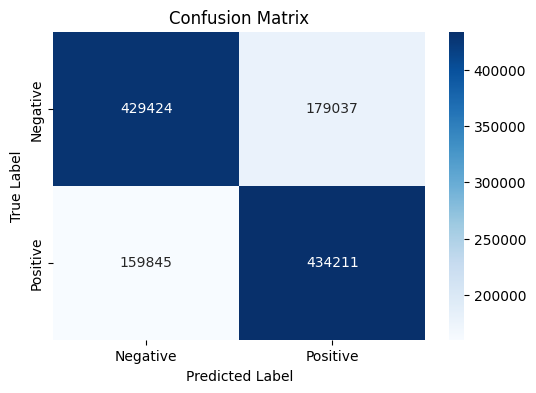

              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72    608461
    Positive       0.71      0.73      0.72    594056

    accuracy                           0.72   1202517
   macro avg       0.72      0.72      0.72   1202517
weighted avg       0.72      0.72      0.72   1202517



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# 예측값 생성
y_pred = (model.predict(X_test) > 0.5).astype(int)

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 정밀도, 재현율, F1-스코어 출력
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

In [5]:
y_pred_prob = model.predict(X_test)
y_pred_prob

37579/37579 [==============================] - 422s 11ms/step


array([[0.79191214],
       [0.76651984],
       [0.47630504],
       ...,
       [0.43211117],
       [0.8688918 ],
       [0.9614371 ]], dtype=float32)

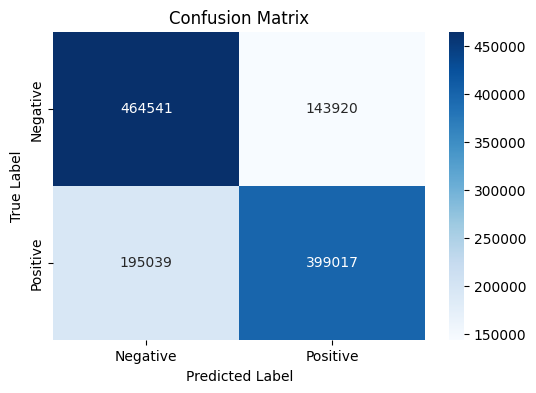

              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73    608461
    Positive       0.73      0.67      0.70    594056

    accuracy                           0.72   1202517
   macro avg       0.72      0.72      0.72   1202517
weighted avg       0.72      0.72      0.72   1202517



In [19]:
y_pred_by_prob = (y_pred_prob > 0.5).astype(int)

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred_by_prob)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 정밀도, 재현율, F1-스코어 출력
print(classification_report(y_test, y_pred_by_prob, target_names=['Negative', 'Positive']))

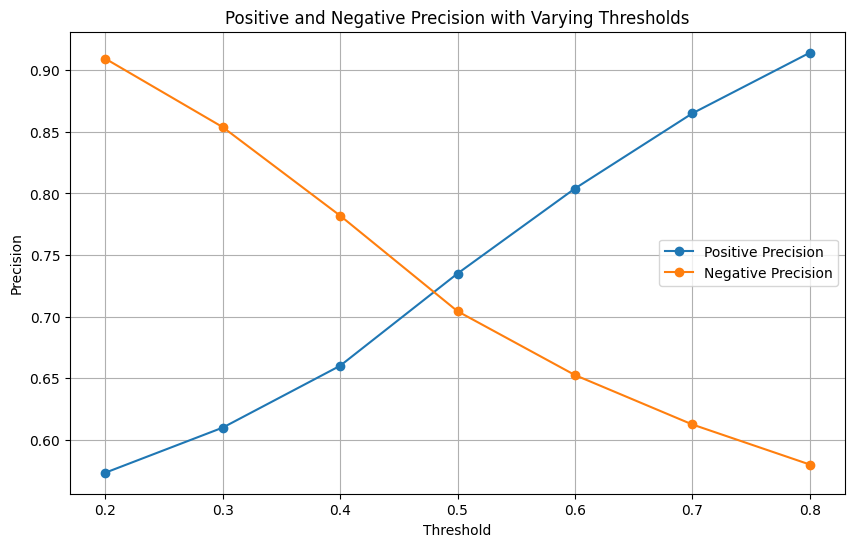

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# 실제 데이터에 맞게 y_test와 y_pred_prob을 사용하세요
# np.random.seed(0)
# y_test = np.random.randint(0, 2, 100)  # 실제 레이블
# y_pred_prob = np.random.rand(100)      # 예측된 확률

# Precision 값들을 저장할 리스트
positive_precisions = []
negative_precisions = []
thresholds = np.arange(0.2, 0.81, 0.1)

# 임계값을 변화시키며 Precision 계산
for threshold in thresholds:
    y_pred_by_threshold = (y_pred_prob > threshold).astype(int)
    positive_precision = precision_score(y_test, y_pred_by_threshold, pos_label=1)
    negative_precision = precision_score(y_test, y_pred_by_threshold, pos_label=0)
    positive_precisions.append(positive_precision)
    negative_precisions.append(negative_precision)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(thresholds, positive_precisions, marker='o', label="Positive Precision")
plt.plot(thresholds, negative_precisions, marker='o', label="Negative Precision")
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Positive and Negative Precision with Varying Thresholds")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 모델 저장
model.save('lstm_s20_e5_b64.h5')

## SEED 1

Train set: (4810067, 20, 18), Test set: (1202517, 20, 18)


Training Progress:   0%|                                                                         | 0/5 [00:00<?, ?it/s]

Epoch 1/5
75158/75158 [==============================] - ETA: 0s - loss: 0.6731 - accuracy: 0.5663

Training Progress:  20%|█████████▍                                     | 1/5 [1:40:45<6:43:00, 6045.15s/it, loss=0.673]

75158/75158 [==============================] - 6045s 80ms/step - loss: 0.6731 - accuracy: 0.5663 - val_loss: 0.6458 - val_accuracy: 0.6079
Epoch 2/5
75158/75158 [==============================] - ETA: 0s - loss: 0.6245 - accuracy: 0.6317

Training Progress:  40%|██████████████████▊                            | 2/5 [2:41:52<3:52:19, 4646.38s/it, loss=0.624]

75158/75158 [==============================] - 3667s 49ms/step - loss: 0.6245 - accuracy: 0.6317 - val_loss: 0.6008 - val_accuracy: 0.6568
Epoch 3/5
75158/75158 [==============================] - ETA: 0s - loss: 0.5861 - accuracy: 0.6701

Training Progress:  60%|████████████████████████████▏                  | 3/5 [4:16:03<2:50:09, 5104.92s/it, loss=0.586]

75158/75158 [==============================] - 5651s 75ms/step - loss: 0.5861 - accuracy: 0.6701 - val_loss: 0.5692 - val_accuracy: 0.6851
Epoch 4/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.5582 - accuracy: 0.6946

Training Progress:  80%|█████████████████████████████████████▌         | 4/5 [6:03:03<1:33:44, 5624.30s/it, loss=0.558]

75158/75158 [==============================] - 6420s 85ms/step - loss: 0.5582 - accuracy: 0.6946 - val_loss: 0.5411 - val_accuracy: 0.7085
Epoch 5/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.5379 - accuracy: 0.7116

Training Progress: 100%|█████████████████████████████████████████████████| 5/5 [8:53:01<00:00, 7273.59s/it, loss=0.538]

75158/75158 [==============================] - 10198s 136ms/step - loss: 0.5379 - accuracy: 0.7116 - val_loss: 0.5254 - val_accuracy: 0.7214


Training Progress: 100%|█████████████████████████████████████████████████| 5/5 [8:53:01<00:00, 6396.29s/it, loss=0.538]


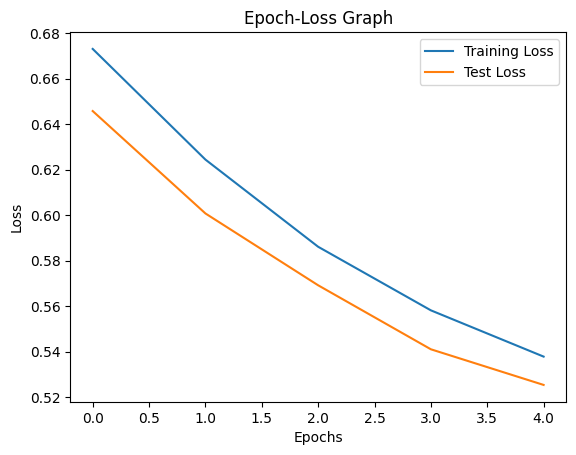

Test Loss: 0.5254, Test Accuracy: 0.7214


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

# 데이터 로드
df_merged = pd.read_csv('final_data_.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['after_10_min']).values
y = df['after_10_min'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 >> window = 20
timesteps = 20
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - timesteps):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=5, 
                    batch_size=64, 
                    callbacks=[tqdm_callback])

# Epoch-Loss 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Epoch-Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [2]:
model.save('lstm_s20_e5_b64_seed1.h5')

## shuffle = False

Train set: (4810067, 20, 18), Test set: (1202517, 20, 18)


Training Progress:   0%|                                                                         | 0/5 [00:00<?, ?it/s]

Epoch 1/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.6662 - accuracy: 0.5761

Training Progress:  20%|█████████▊                                       | 1/5 [51:51<3:27:25, 3111.36s/it, loss=0.666]

75158/75158 [==============================] - 3111s 41ms/step - loss: 0.6662 - accuracy: 0.5761 - val_loss: 0.8716 - val_accuracy: 0.5091
Epoch 2/5
75158/75158 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.6521

Training Progress:  40%|██████████████████▊                            | 2/5 [1:42:07<2:32:45, 3055.19s/it, loss=0.605]

75158/75158 [==============================] - 3016s 40ms/step - loss: 0.6046 - accuracy: 0.6521 - val_loss: 1.0923 - val_accuracy: 0.5077
Epoch 3/5
75158/75158 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.6953

Training Progress:  60%|████████████████████████████▏                  | 3/5 [2:33:00<1:41:48, 3054.34s/it, loss=0.557]

75158/75158 [==============================] - 3053s 41ms/step - loss: 0.5568 - accuracy: 0.6953 - val_loss: 1.3612 - val_accuracy: 0.5073
Epoch 4/5
75158/75158 [==============================] - ETA: 0s - loss: 0.5249 - accuracy: 0.7210

Training Progress:  80%|███████████████████████████████████████▏         | 4/5 [3:24:16<51:02, 3062.74s/it, loss=0.525]

75158/75158 [==============================] - 3076s 41ms/step - loss: 0.5249 - accuracy: 0.7210 - val_loss: 1.5280 - val_accuracy: 0.5086
Epoch 5/5
75157/75158 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.7378

Training Progress: 100%|█████████████████████████████████████████████████| 5/5 [4:15:53<00:00, 3075.12s/it, loss=0.503]

75158/75158 [==============================] - 3097s 41ms/step - loss: 0.5031 - accuracy: 0.7378 - val_loss: 1.4420 - val_accuracy: 0.5087


Training Progress: 100%|█████████████████████████████████████████████████| 5/5 [4:15:53<00:00, 3070.65s/it, loss=0.503]


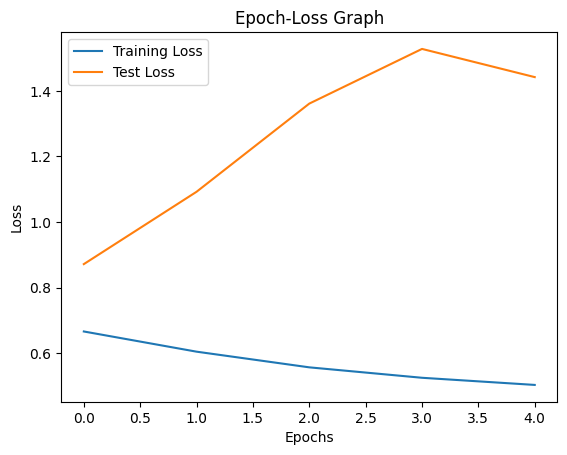

Test Loss: 1.4420, Test Accuracy: 0.5087


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

# 데이터 로드
df_merged = pd.read_csv('final_data_.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['after_10_min']).values
y = df['after_10_min'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 >> window = 20
timesteps = 20
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - timesteps):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle = False)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=5, 
                    batch_size=64, 
                    callbacks=[tqdm_callback])

# Epoch-Loss 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Epoch-Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

## Seq=30, batch = 32, 겹치는 부분 없음

In [3]:
df_merged = pd.read_csv('final_data.csv')

In [4]:
df_merged

,total_ask_size,total_bid_size,1_ask_size,1_bid_size,2_ask_size,2_bid_size,3_ask_size,3_bid_size,4_ask_size,4_bid_size,5_ask_size,5_bid_size,trade_price,trade_volume,spread,imbalance,totalSize_ratio,trade_price_10min_later
0,0.499237,0.925602,0.032215,0.005979,0.006364,0.016141,0.12224,0.063830,0.000120,0.300359,0.00102,0.080266,83658000.0,0.000100,36000.0,0.299237,1.854033,1
1,0.501627,0.896695,0.032215,0.005979,0.006364,0.016141,0.12224,0.300359,0.000120,0.080266,0.00102,0.142020,83658000.0,0.000100,36000.0,0.282530,1.787573,1
2,0.501627,0.861926,0.032215,0.000061,0.006364,0.005979,0.12224,0.016141,0.000120,0.300359,0.00102,0.080266,83658000.0,0.000100,33000.0,0.264235,1.718261,1
3,0.500431,0.861926,0.031019,0.000061,0.006364,0.005979,0.12224,0.016141,0.000120,0.300359,0.00102,0.080266,83658000.0,0.001195,33000.0,0.265345,1.722365,1
4,0.500431,0.878067,0.031019,0.000061,0.006364,0.005979,0.12224,0.032282,0.000120,0.300359,0.00102,0.080266,83658000.0,0.001195,33000.0,0.273947,1.754620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8539356,0.964932,0.630721,0.020055,0.009224,0.020583,0.205333,0.10297,0.100730,0.131715,0.003442,0.04228,0.000434,115201000.0,0.000886,61000.0,-0.209451,0.653643,1
8539357,0.964932,0.630721,0.020055,0.009224,0.020583,0.205333,0.10297,0.100730,0.131715,0.003442,0.04228,0.000434,115201000.0,0.000886,61000.0,-0.209451,0.653643,1
8539358,0.964932,0.634150,0.020055,0.004341,0.020583,0.009224,0.10297,0.205333,0.131715,0.100730,0.04228,0.003442,115201000.0,0.000886,60000.0,-0.206858,0.657196,1
8539359,0.963627,0.588224,0.018750,0.004441,0.020583,0.009224,0.10297,0.205333,0.131715,0.100730,0.04228,0.003442,115262000.0,0.000652,60000.0,-0.241907,0.610427,1


Train set: (227716, 30, 17), Test set: (56929, 30, 17)


Training Progress:   0%|                                                                        | 0/20 [00:00<?, ?it/s]

Epoch 1/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.5156

Training Progress:   5%|██▌                                               | 1/20 [04:01<1:16:22, 241.18s/it, loss=0.69]

7117/7117 [==============================] - 241s 33ms/step - loss: 0.6897 - accuracy: 0.5156 - val_loss: 0.6880 - val_accuracy: 0.5247
Epoch 2/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6883 - accuracy: 0.5185

Training Progress:  10%|████▉                                            | 2/20 [13:08<2:06:21, 421.17s/it, loss=0.688]

7117/7117 [==============================] - 547s 77ms/step - loss: 0.6883 - accuracy: 0.5185 - val_loss: 0.6884 - val_accuracy: 0.5213
Epoch 3/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6877 - accuracy: 0.5215

Training Progress:  15%|███████▎                                         | 3/20 [22:18<2:16:00, 480.04s/it, loss=0.688]

7117/7117 [==============================] - 550s 77ms/step - loss: 0.6877 - accuracy: 0.5215 - val_loss: 0.6876 - val_accuracy: 0.5241
Epoch 4/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6870 - accuracy: 0.5254

Training Progress:  20%|█████████▊                                       | 4/20 [31:31<2:15:43, 508.98s/it, loss=0.687]

7117/7117 [==============================] - 553s 78ms/step - loss: 0.6870 - accuracy: 0.5254 - val_loss: 0.6873 - val_accuracy: 0.5244
Epoch 5/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6868 - accuracy: 0.5276

Training Progress:  25%|████████████▎                                    | 5/20 [40:45<2:11:14, 524.99s/it, loss=0.687]

7117/7117 [==============================] - 553s 78ms/step - loss: 0.6868 - accuracy: 0.5276 - val_loss: 0.6881 - val_accuracy: 0.5244
Epoch 6/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.5307

Training Progress:  30%|██████████████                                 | 6/20 [1:10:25<3:42:07, 951.97s/it, loss=0.686]

7117/7117 [==============================] - 1781s 250ms/step - loss: 0.6861 - accuracy: 0.5307 - val_loss: 0.6870 - val_accuracy: 0.5306
Epoch 7/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5285

Training Progress:  35%|████████████████▍                              | 7/20 [1:19:30<2:57:23, 818.76s/it, loss=0.686]

7117/7117 [==============================] - 545s 77ms/step - loss: 0.6862 - accuracy: 0.5285 - val_loss: 0.6871 - val_accuracy: 0.5257
Epoch 8/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.5288

Training Progress:  40%|██████████████████▊                            | 8/20 [1:28:37<2:26:28, 732.38s/it, loss=0.686]

7117/7117 [==============================] - 547s 77ms/step - loss: 0.6860 - accuracy: 0.5288 - val_loss: 0.6868 - val_accuracy: 0.5285
Epoch 9/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5284

Training Progress:  45%|█████████████████████▏                         | 9/20 [1:37:48<2:03:51, 675.61s/it, loss=0.686]

7117/7117 [==============================] - 551s 77ms/step - loss: 0.6859 - accuracy: 0.5284 - val_loss: 0.6872 - val_accuracy: 0.5283
Epoch 10/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5315

Training Progress:  50%|███████████████████████                       | 10/20 [1:46:42<1:45:18, 631.84s/it, loss=0.686]

7117/7117 [==============================] - 534s 75ms/step - loss: 0.6856 - accuracy: 0.5316 - val_loss: 0.6869 - val_accuracy: 0.5296
Epoch 11/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5329

Training Progress:  55%|█████████████████████████▎                    | 11/20 [1:55:37<1:30:20, 602.28s/it, loss=0.686]

7117/7117 [==============================] - 535s 75ms/step - loss: 0.6855 - accuracy: 0.5329 - val_loss: 0.6869 - val_accuracy: 0.5297
Epoch 12/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.5364

Training Progress:  60%|███████████████████████████▌                  | 12/20 [2:04:46<1:18:06, 585.86s/it, loss=0.685]

7117/7117 [==============================] - 548s 77ms/step - loss: 0.6848 - accuracy: 0.5364 - val_loss: 0.6865 - val_accuracy: 0.5318
Epoch 13/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6843 - accuracy: 0.5372

Training Progress:  65%|█████████████████████████████▉                | 13/20 [2:13:36<1:06:22, 568.94s/it, loss=0.684]

7117/7117 [==============================] - 530s 74ms/step - loss: 0.6843 - accuracy: 0.5372 - val_loss: 0.6864 - val_accuracy: 0.5336
Epoch 14/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.5396

Training Progress:  70%|█████████████████████████████████▌              | 14/20 [2:22:30<55:51, 558.54s/it, loss=0.684]

7117/7117 [==============================] - 535s 75ms/step - loss: 0.6838 - accuracy: 0.5396 - val_loss: 0.6859 - val_accuracy: 0.5329
Epoch 15/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5406

Training Progress:  75%|████████████████████████████████████            | 15/20 [2:31:32<46:07, 553.52s/it, loss=0.684]

7117/7117 [==============================] - 542s 76ms/step - loss: 0.6835 - accuracy: 0.5406 - val_loss: 0.6857 - val_accuracy: 0.5333
Epoch 16/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6829 - accuracy: 0.5419

Training Progress:  80%|██████████████████████████████████████▍         | 16/20 [2:40:27<36:32, 548.03s/it, loss=0.683]

7117/7117 [==============================] - 535s 75ms/step - loss: 0.6829 - accuracy: 0.5419 - val_loss: 0.6854 - val_accuracy: 0.5368
Epoch 17/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.5437

Training Progress:  85%|████████████████████████████████████████▊       | 17/20 [2:49:10<27:01, 540.52s/it, loss=0.682]

7117/7117 [==============================] - 523s 73ms/step - loss: 0.6824 - accuracy: 0.5437 - val_loss: 0.6857 - val_accuracy: 0.5374
Epoch 18/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.5454

Training Progress:  90%|███████████████████████████████████████████▏    | 18/20 [2:58:14<18:03, 541.53s/it, loss=0.682]

7117/7117 [==============================] - 544s 76ms/step - loss: 0.6816 - accuracy: 0.5454 - val_loss: 0.6857 - val_accuracy: 0.5365
Epoch 19/20
7116/7117 [============================>.] - ETA: 0s - loss: 0.6814 - accuracy: 0.5471

Training Progress:  95%|█████████████████████████████████████████████▌  | 19/20 [3:07:23<09:03, 543.66s/it, loss=0.681]

7117/7117 [==============================] - 549s 77ms/step - loss: 0.6814 - accuracy: 0.5470 - val_loss: 0.6854 - val_accuracy: 0.5364
Epoch 20/20
7117/7117 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.5478

Training Progress: 100%|████████████████████████████████████████████████| 20/20 [3:16:13<00:00, 539.52s/it, loss=0.681]

7117/7117 [==============================] - 530s 74ms/step - loss: 0.6808 - accuracy: 0.5478 - val_loss: 0.6859 - val_accuracy: 0.5356


Training Progress: 100%|████████████████████████████████████████████████| 20/20 [3:16:13<00:00, 588.66s/it, loss=0.681]


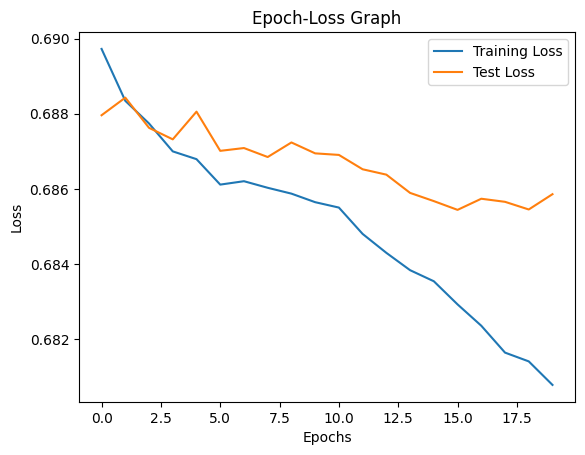

Test Loss: 0.6859, Test Accuracy: 0.5356


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

# 데이터 로드
df_merged = pd.read_csv('final_data.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = 30
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, timesteps):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=20, 
                    batch_size=32, 
                    callbacks=[tqdm_callback])

# Epoch-Loss 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Epoch-Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

## Seq30, batch4, epoch10

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

# 데이터 로드
df_merged = pd.read_csv('final_data.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = 30
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, timesteps):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=10, 
                    batch_size=4, 
                    callbacks=[tqdm_callback])

# Epoch-Loss 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Epoch-Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train set: (227716, 30, 17), Test set: (56929, 30, 17)


Training Progress:   0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/10
56928/56929 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5049

Training Progress:  10%|████▌                                        | 1/10 [2:38:05<23:42:53, 9485.98s/it, loss=0.691]

56929/56929 [==============================] - 9486s 167ms/step - loss: 0.6909 - accuracy: 0.5049 - val_loss: 0.6894 - val_accuracy: 0.5035
Epoch 2/10
56929/56929 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5023

Training Progress:  20%|█████████                                    | 2/10 [3:26:20<12:27:50, 5608.81s/it, loss=0.689]

56929/56929 [==============================] - 2895s 51ms/step - loss: 0.6892 - accuracy: 0.5023 - val_loss: 0.6893 - val_accuracy: 0.5036
Epoch 3/10
56928/56929 [============================>.] - ETA: 0s - loss: 0.6894 - accuracy: 0.5047

Training Progress:  30%|█████████████▊                                | 3/10 [4:14:41<8:30:05, 4372.23s/it, loss=0.689]

56929/56929 [==============================] - 2901s 51ms/step - loss: 0.6894 - accuracy: 0.5047 - val_loss: 0.6892 - val_accuracy: 0.5036
Epoch 4/10
56929/56929 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5028

Training Progress:  40%|██████████████████▍                           | 4/10 [6:06:31<8:49:30, 5295.03s/it, loss=0.689]

56929/56929 [==============================] - 6710s 118ms/step - loss: 0.6892 - accuracy: 0.5028 - val_loss: 0.6895 - val_accuracy: 0.5029
Epoch 5/10
56929/56929 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5034

Training Progress:  50%|███████████████████████                       | 5/10 [6:30:04<5:24:35, 3895.19s/it, loss=0.689]

56929/56929 [==============================] - 1413s 25ms/step - loss: 0.6890 - accuracy: 0.5034 - val_loss: 0.6891 - val_accuracy: 0.5039
Epoch 6/10
56929/56929 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5042

Training Progress:  60%|███████████████████████████▌                  | 6/10 [7:11:31<3:47:45, 3416.49s/it, loss=0.689]

56929/56929 [==============================] - 2487s 44ms/step - loss: 0.6890 - accuracy: 0.5042 - val_loss: 0.6892 - val_accuracy: 0.5033
Epoch 7/10
43963/56929 [======================>.......] - ETA: 9:11 - loss: 0.6892 - accuracy: 0.5076

KeyboardInterrupt: 

## per day

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

# 데이터 로드
df_merged = pd.read_csv('final_data_d.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = 30
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, timesteps):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=10, 
                    batch_size=4, 
                    callbacks=[tqdm_callback])

# Epoch-Loss 그래프 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Epoch-Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")